In [3]:
# 라이브러리 추가
import pandas as pd
import seaborn as sns; sns.set(style='darkgrid', font='KoPubDotum', font_scale=1.5)
import matplotlib.pyplot as plt

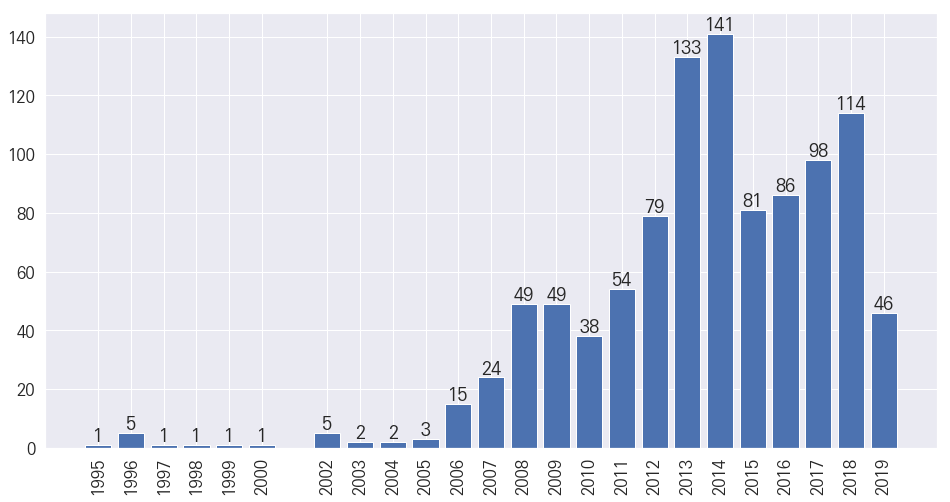

In [4]:
# 깃대종 기사건수
df = pd.read_excel('D:/GEODATA/bigkinds.xlsx', sheet_name='sheet' ,index_col='일자', parse_dates=True)
df1 = df.groupby(df.index.year).size()
f, ax = plt.subplots(figsize=(16, 8)); plt.xticks(df1.index, rotation=90)
plot = ax.bar(df1.index, df1.values)
for rect in plot:
              height = rect.get_height()
              ax.text(rect.get_x() + rect.get_width()/2., height, '%d' %int(height), ha='center', va='bottom')
plt.savefig('D:/GEODATA/IMG01.png', bbox_inches='tight')

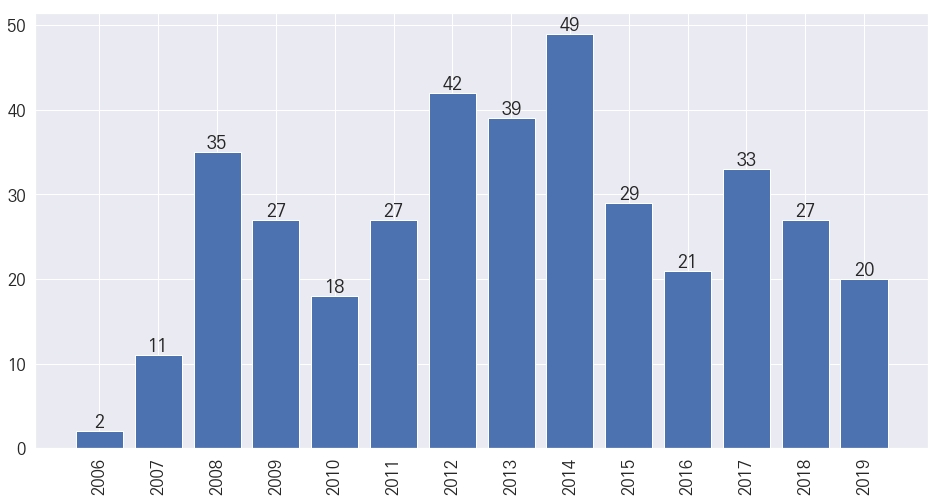

In [5]:
# 국립공원이 언급된 깃대종 기사건수
df2 = df[df['제목'].str.contains('국립공원') | df['본문'].str.contains('국립공원')]
df2 = df2.groupby(df2.index.year).size()
f, ax = plt.subplots(figsize=(16, 8)); plt.xticks(df2.index, rotation=90)
plot = ax.bar(df2.index, df2.values)
for rect in plot:
              height = rect.get_height()
              ax.text(rect.get_x() + rect.get_width()/2., height, '%d' %int(height), ha='center', va='bottom')
plt.savefig('D:/GEODATA/IMG02.png', bbox_inches='tight')

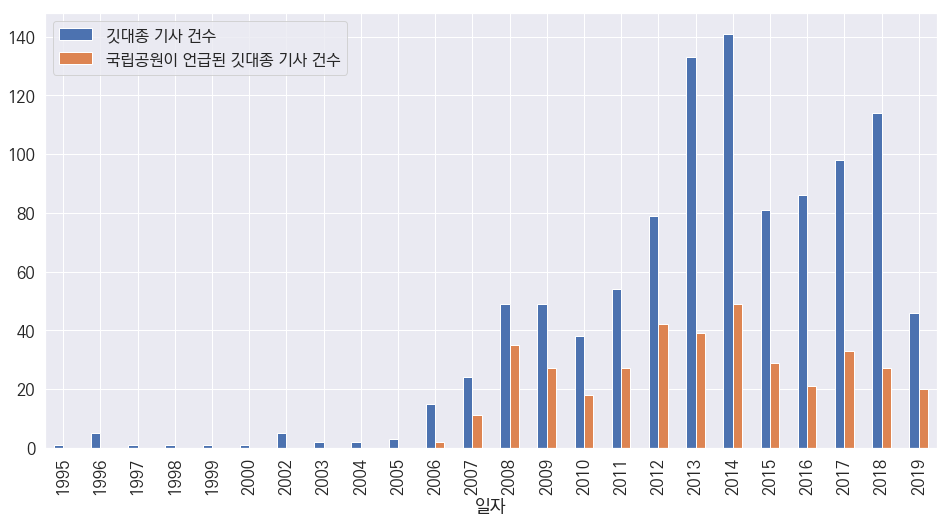

In [6]:
# 깃대종 기사건수, 국립공원이 언급된 깃대종 기사건수
pd.concat([df1, df2], axis=1).plot(kind='bar', figsize=(16, 8))
plt.legend(["깃대종 기사 건수", "국립공원이 언급된 깃대종 기사 건수"])
plt.savefig('D:/GEODATA/IMG03.png', bbox_inches='tight')

In [7]:
print('깃대종 기사 ' + str(df1.sum()) + '건 중 국립공원이 언급된 깃대종 기사 '
      + str(df2.sum()) + '건: ' + str(format(df2.sum() / df1.sum() * 100, ".1f")) + '% 차지')

깃대종 기사 1029건 중 국립공원이 언급된 깃대종 기사 380건: 36.9% 차지


In [8]:
# 한나눔 불러오기
from konlpy.tag import Hannanum
hannanum = Hannanum()

In [9]:
# 기사 제목
df[['제목']].to_csv('D:/GEODATA/bigkinds.txt', index=False, header=False)
f = open("D:/GEODATA/bigkinds.txt", 'r', encoding='UTF-8')
lines = f.readlines()
f.close()

In [10]:
# 단어빈도 분석
word = []
for i in range(len(lines)):
    word.append(hannanum.nouns(lines[i]))
    
def flatten(l):
    flatList = []
    for elem in l:
        if type(elem) == list:
            for e in elem:
                flatList.append(e)
        else:
            flatList.append(elem)
    return flatList

word_list = flatten(word)
word_list = pd.Series([x for x in word_list if len(x)>1])
word_list.value_counts().head(20)

깃대종      126
복원        54
대전        51
선정        50
멸종위기      42
서식        42
하늘다람쥐     36
대전시       35
국립공원      33
발견        32
대표        30
생태계       28
지리산       27
확인        25
포착        23
성남시       22
자연        22
담비        21
무등산       21
동식물       21
dtype: int64

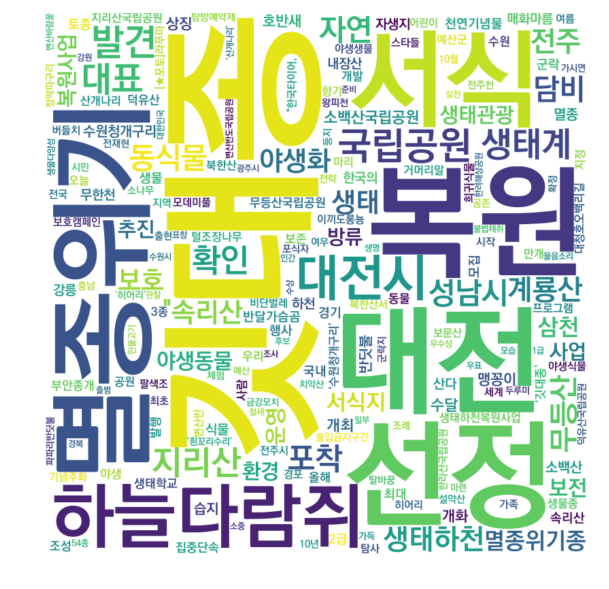

In [11]:
# 단어구름
from wordcloud import WordCloud
from collections import Counter

font_path = 'c:/Windows/Fonts/KoPubDotumBold.ttf'
wordcloud = WordCloud(font_path=font_path, width=800, height=800, background_color="white")

count = Counter(word_list)
wordcloud = wordcloud.generate_from_frequencies(count)
array = wordcloud.to_array()

fig = plt.figure(figsize=(10,10))
plt.imshow(array, interpolation="bilinear")
plt.axis("off")
plt.savefig('D:/GEODATA/IMG04.png', bbox_inches='tight')

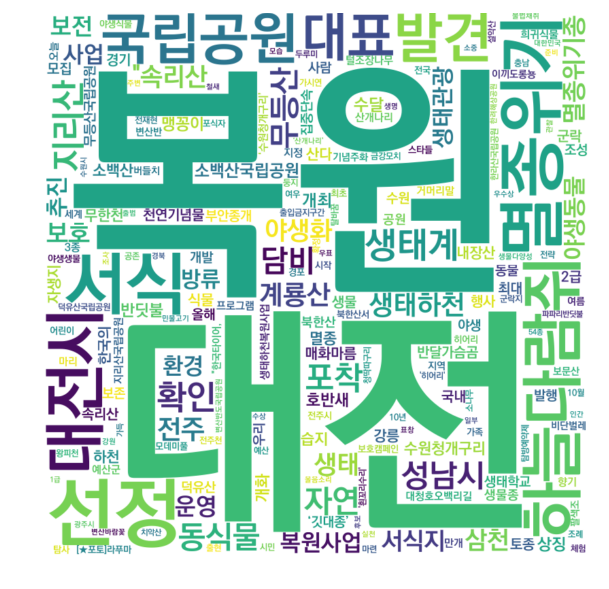

In [12]:
# 깃대종을 제외한 단어구름
count.pop("깃대종")
wordcloud = wordcloud.generate_from_frequencies(count)
array = wordcloud.to_array()

fig = plt.figure(figsize=(10,10))
plt.imshow(array, interpolation="bilinear")
plt.axis("off")
plt.savefig('D:/GEODATA/IMG05.png', bbox_inches='tight')
plt.show()